# Detección de fraudes en transacciones de tarjetas de crédito 💳

## Requisitos y dependencias

In [ ]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !conda install -y anaconda::scikit-learn

In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Extracción de datos 🚀

In [3]:
df_sub      = pd.read_csv('sample_submission.csv')
df_test     = pd.read_csv('test.csv')
df_train    = pd.read_csv('train.csv')

## Etapa de analisis *EDA* 👨‍💻

### Visualizo datos *Entrenamiento*

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  150000 non-null  int64  
 1   Time                150000 non-null  float64
 2   feat1               150000 non-null  float64
 3   feat2               150000 non-null  float64
 4   feat3               150000 non-null  float64
 5   feat4               150000 non-null  float64
 6   feat5               150000 non-null  float64
 7   feat6               150000 non-null  float64
 8   feat7               150000 non-null  float64
 9   feat8               150000 non-null  float64
 10  feat9               150000 non-null  float64
 11  feat10              150000 non-null  float64
 12  feat11              150000 non-null  float64
 13  feat12              150000 non-null  float64
 14  feat13              150000 non-null  float64
 15  feat14              150000 non-nul

#### Verifico los datos que contiene mi variable objetivo

In [5]:
df_train['IsFraud'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: IsFraud, dtype: int64

In [15]:
df_train[['IsFraud']].groupby('IsFraud').count().head()

""
IsFraud
0
1


### Separar variasbles númericas *(dimensionales)* con ordinales *(categóricas)*
- **En este caso solo tenemos**

### Correlación

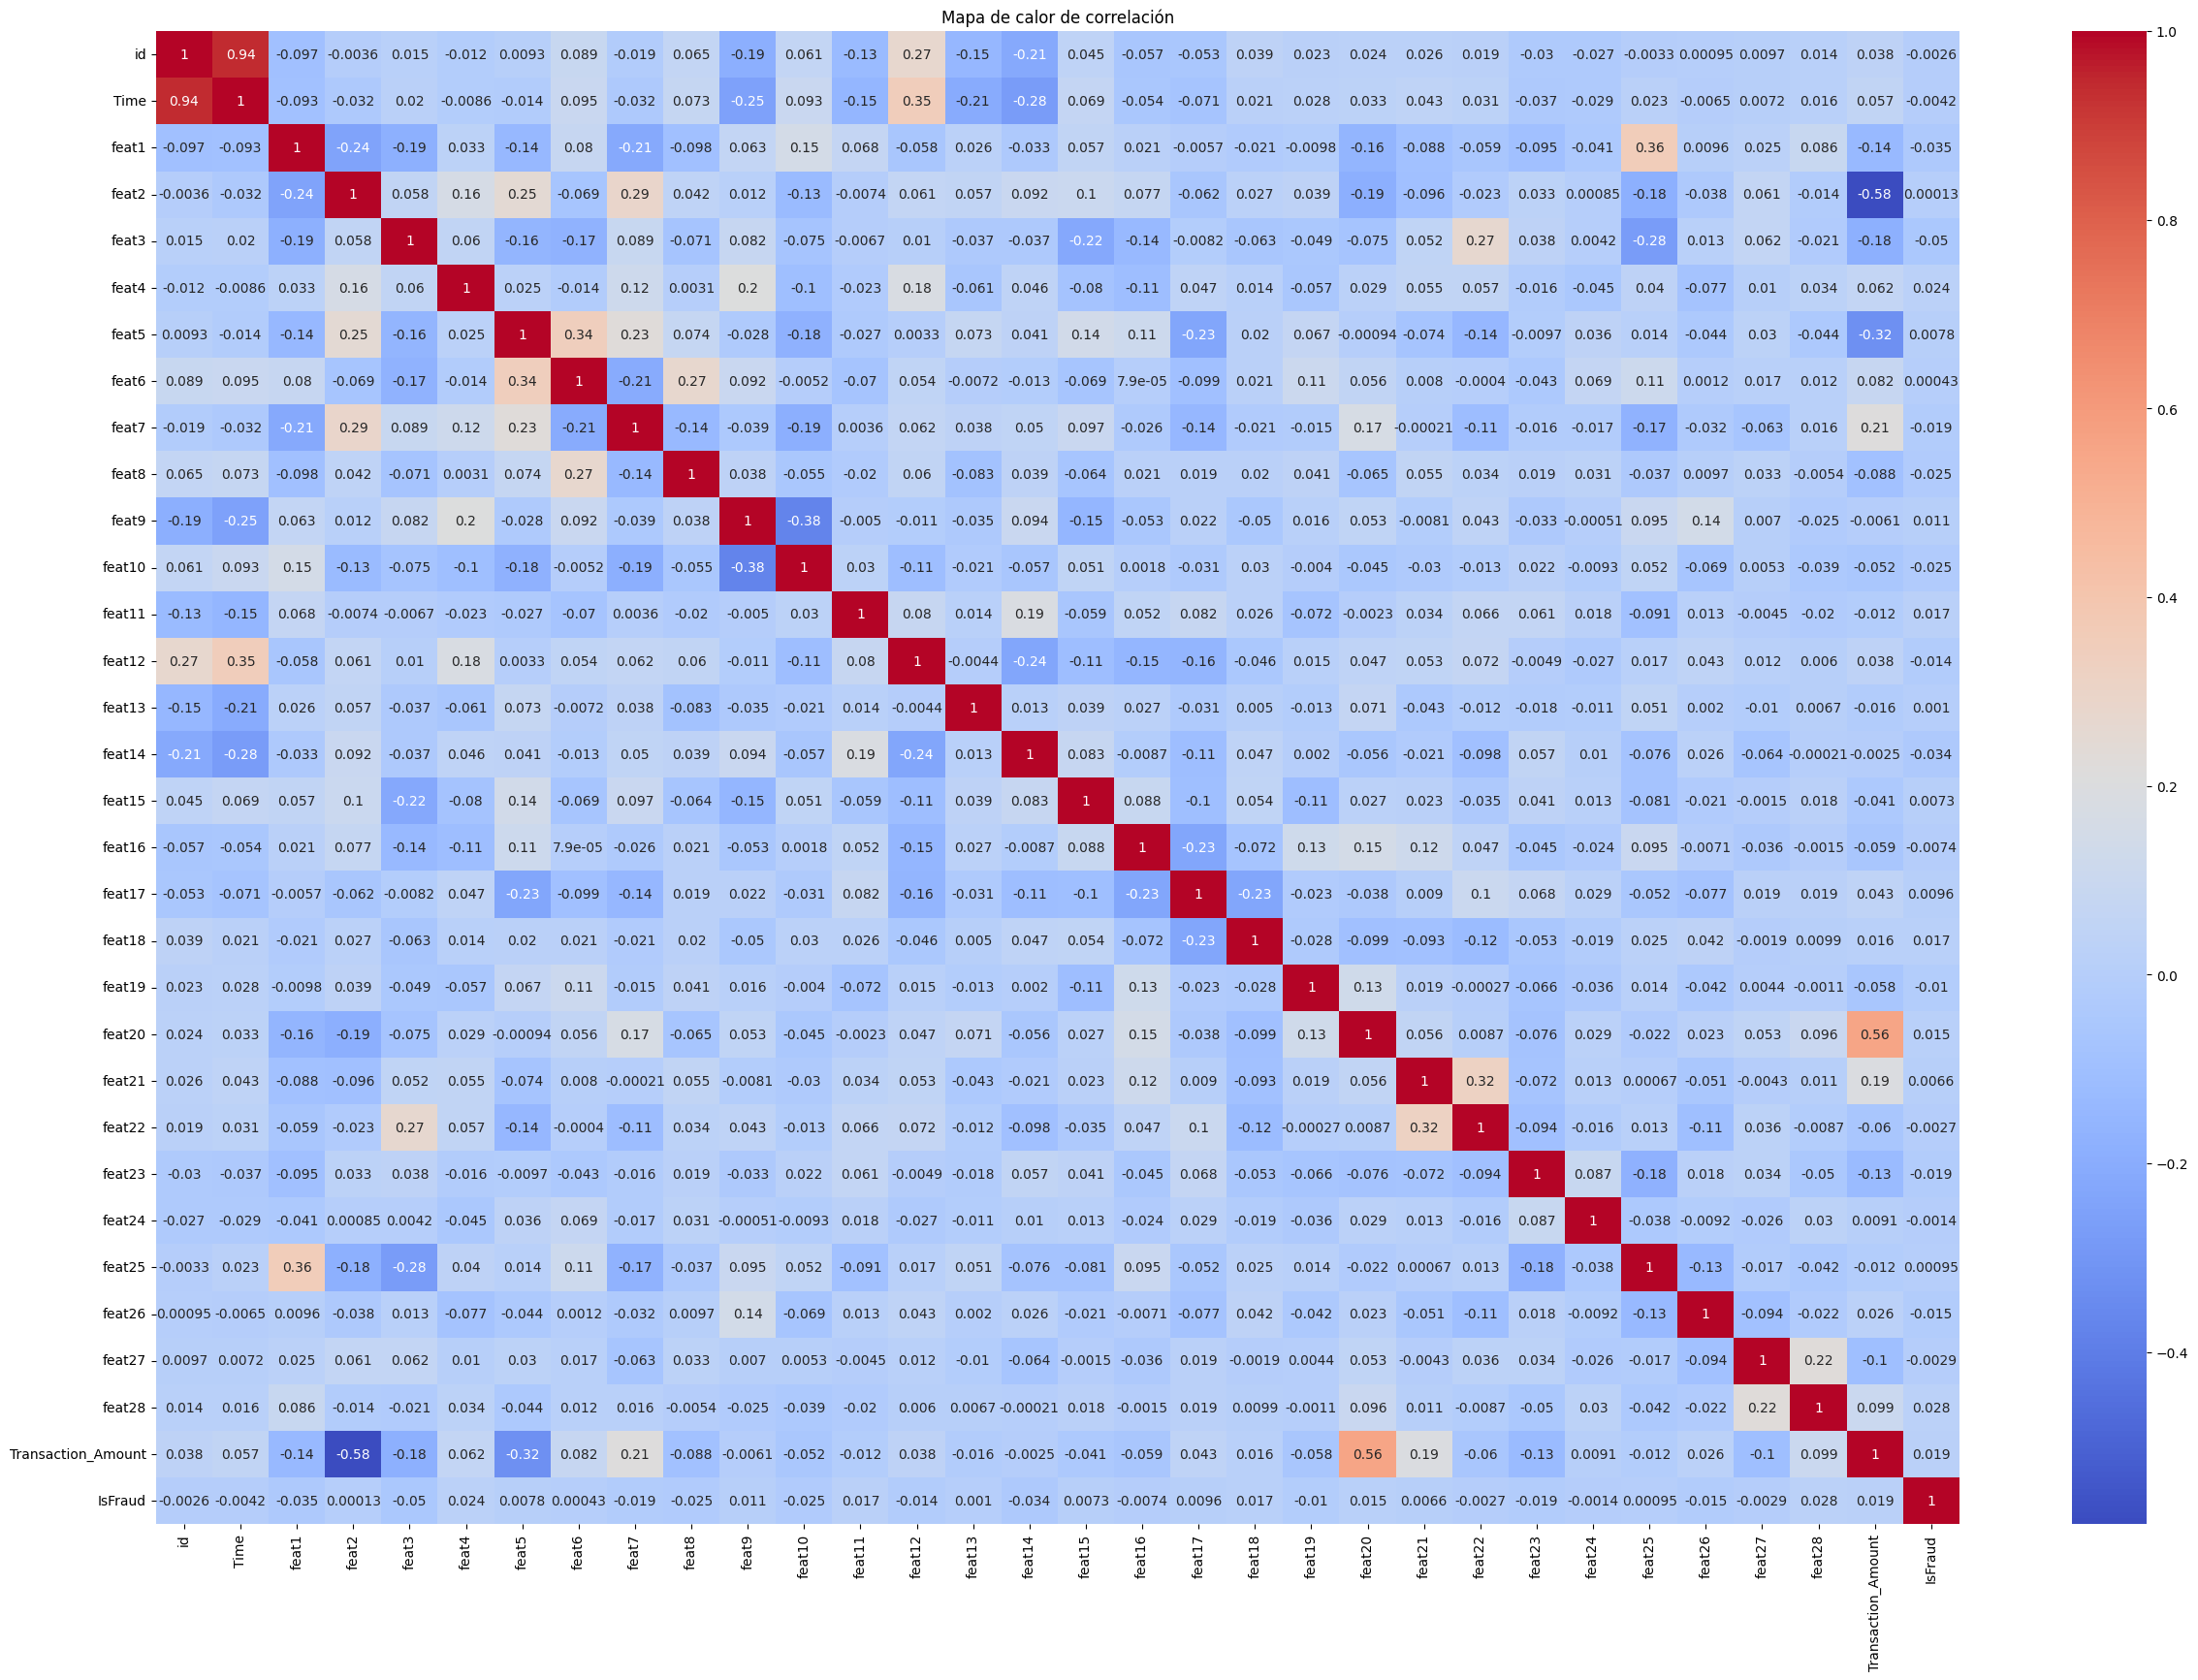

In [7]:
# Carga tu DataFrame
df = df_train

# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Crea el mapa de calor
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()


La correlación es muy baja, no es necesario hacer pca

### Detección de datos anómalos 

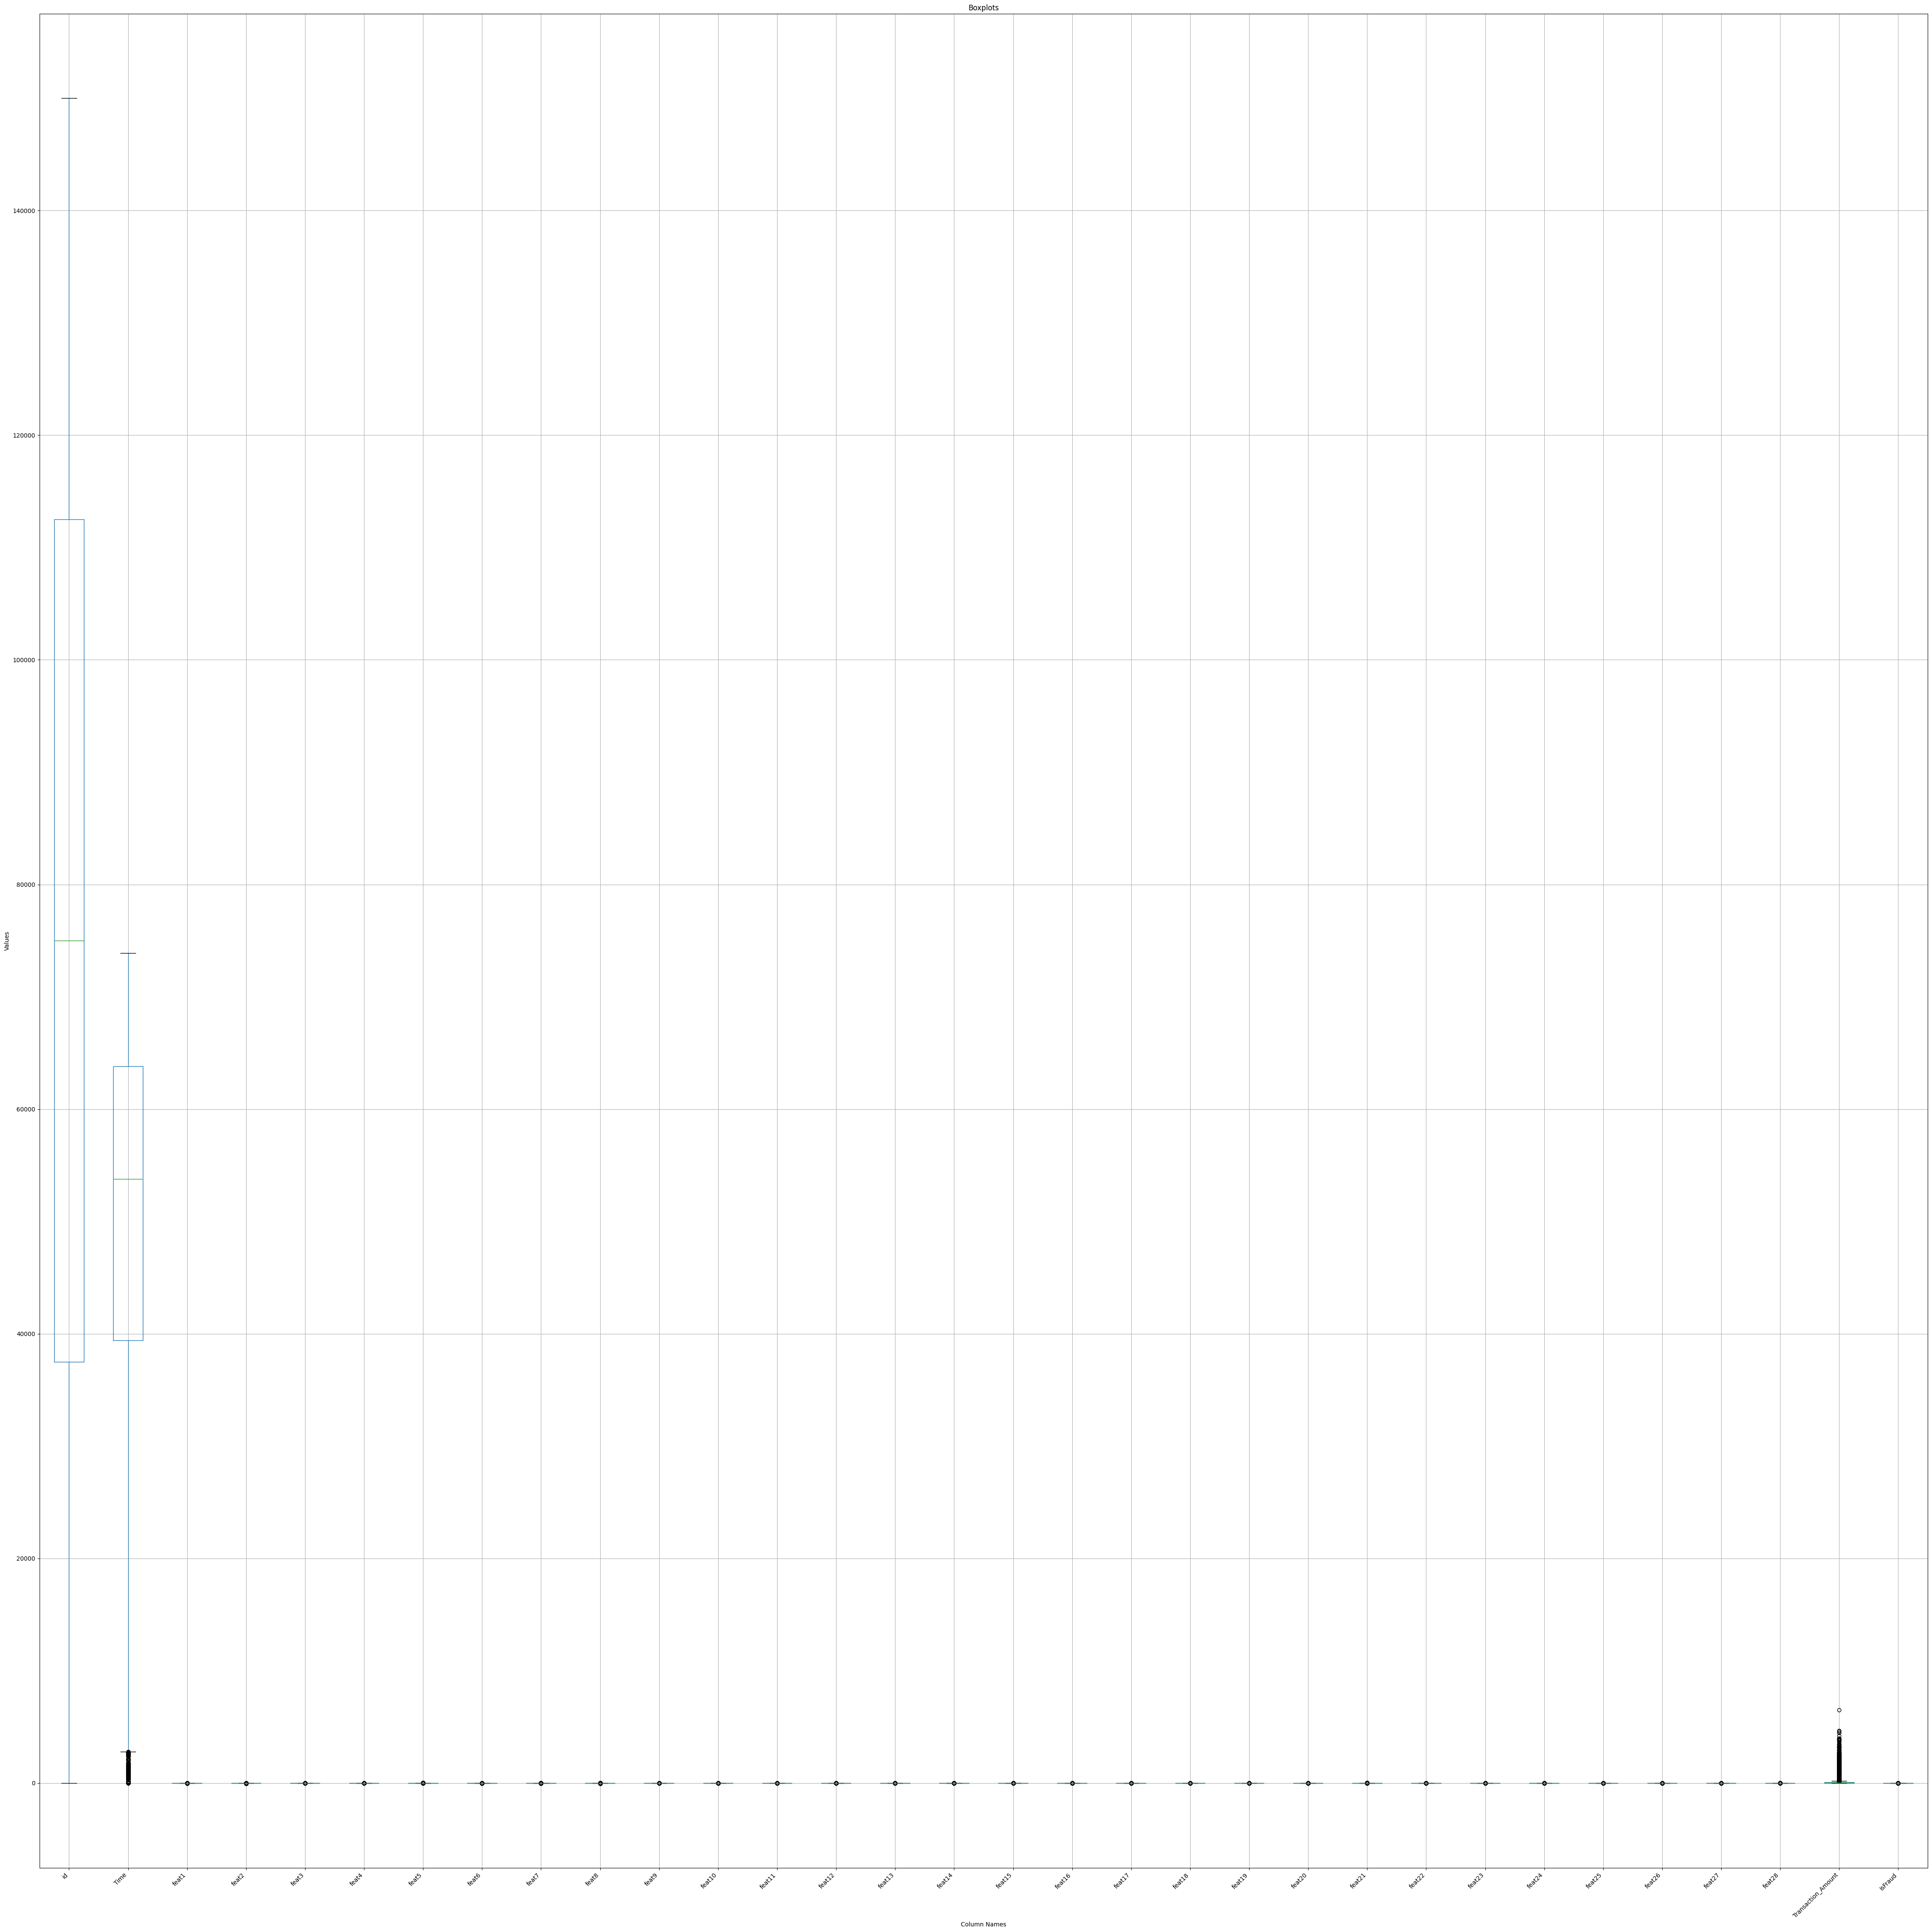

In [17]:
# Assuming your DataFrame is named 'data' and has numerical columns
data_to_plot = df_train.select_dtypes(include=[np.number])  # Select numerical columns

# Create the boxplot
plt.figure(figsize=(45, 45))  # Adjust figure size as needed
data_to_plot.boxplot()

# Customize the plot (optional)
plt.xlabel("Column Names")
plt.ylabel("Values")
plt.title("Boxplots")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


Lo que quiere decir que mis datos no contienen outlayers

### Histograma de datos

In [18]:
def visualizar_distribuciones(df):
  """
  Visualiza histogramas y KDE para todas las variables numéricas de un DataFrame.

  Parámetros:
    df: DataFrame con las variables.

  Retorno:
    None.
  """
  # Filtrar variables numéricas
  variables_numericas = df.select_dtypes(include=['number'])

  # Recorrer las variables numéricas
  for variable in variables_numericas:
    # Crear un subplot para cada variable
    fig, ax = plt.subplots(figsize=(6, 4))

    # Histograma
    sns.histplot(data=df, x=variable, ax=ax)

    # KDE
    sns.displot(data=df, x=variable, kind="kde", ax=ax)

    # Título
    ax.set_title(variable)

    # Mostrar el plot
    plt.show()

In [ ]:
# visualizar_distribuciones(df_train)

## Etapa de Pre-proceso de datos 🧠
**Notas**: 
- la variable objetivo *IsFraud* es binaria

### En esta prueba utilizaremos **MinMaxScaler**

In [26]:
# Escalar con MinMaxScaler
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df_train), columns=df_train.columns)

# Escalar con StandardScaler
scaler_standard = StandardScaler()
df_standard = pd.DataFrame(scaler_standard.fit_transform(df_train), columns=df_train.columns)

# Crear subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Distribución original
sns.displot(data=df_train, ax=axes[0])
axes[0].set_title("Datos originales")

# Distribución con MinMaxScaler
sns.displot(data=df_minmax, ax=axes[1])
axes[1].set_title("MinMaxScaler")

# Distribución con StandardScaler
sns.displot(data=df_standard, ax=axes[2])
axes[2].set_title("StandardScaler")

plt.show()

/home/elalocador/miniconda3/envs/tf/lib/python3.10/site-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
